## Explorating missing values.
Setting up our environment.

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot
import janitor

### Set up a general overview for projects' plots.

In [2]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

##### Python

In [3]:
print(
    None or True,
    None or False,
    None == None,
    None is None,
    type(None),
    sep='\n'
)

True
False
True
True
<class 'NoneType'>


##### NumPy

In [4]:
print(
    np.nan or True,
    np.nan or False,
    type(np.nan),
    np.nan == np.nan, #we are talking about float datatypes, we cannot compare 'em because both are instances of class 'Float'
    np.nan is np.nan,
    np.isnan(np.nan),
    sep='\n'
)

nan
nan
<class 'float'>
False
True
True


##### Pandas

In [5]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0, 1, np.nan, np.nan, None],
        y=[0, 1, pd.NA, np.nan, None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [6]:
(
    test_missing_df
    .isnull()
    # .isna()
)

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


## Loading Datasets
### Pima Indians Diabetes

In [38]:
import pathlib

In [51]:
current_dir = pathlib.Path('.').absolute()
data_dir = current_dir.joinpath('../data/raw/pima-indians-diabetes.csv')

In [53]:
pima_indians_diabetes_url = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

In [54]:
if not data_dir.exists():
    !wget -P './../data/raw/pima-indians-diabetes.csv' { pima_indians_diabetes_url } -q

In [55]:
diabetes_df = pd.read_csv(
    './../data/raw/pima-indians-diabetes.csv',
    sep=',',
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
    )
diabetes_df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### naniar (oceanbuoys, pedestrian, riskfactors)
#### Creating info units from datasets.

In [10]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

In [57]:
datasets_dfs = {}

for dataset_name in datasets_names:

    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"./../data/raw/{ dataset_file }"
    dataset_url = f"{ base_url }{ dataset_file }"

    !wget -q -O { dataset_output_file } { dataset_url }
    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

#### Including datasets in our virtual environment.

In [58]:
locals().update(**datasets_dfs)
del datasets_dfs

In [59]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (768, 9))

In [62]:
%run pandas-missing-extension.ipynb

## Tabulating missing values

In [63]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### Brief resume of missing values

In [64]:
riskfactors_df.size

8330

In [65]:
riskfactors_df.shape

(245, 34)

#### Total complete values

In [66]:
riskfactors_df.missing.number_complete()

7144

#### Total missing values

In [67]:
riskfactors_df.missing.number_missing()

1186

## Tabular review of missing values
### Variables / columns
#### Resume per variable

In [68]:
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


#### Tabulation of the resume per variable

In [77]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


#### Cases / Observations / Rows
##### Resume per case

In [70]:
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


In [71]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


### Missing value intervals

In [72]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable='weight_lbs',
        span_every=50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


### _Run length_ of missing values

In [73]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable='weight_lbs'
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


### Initial visualization of missing values
#### Variable

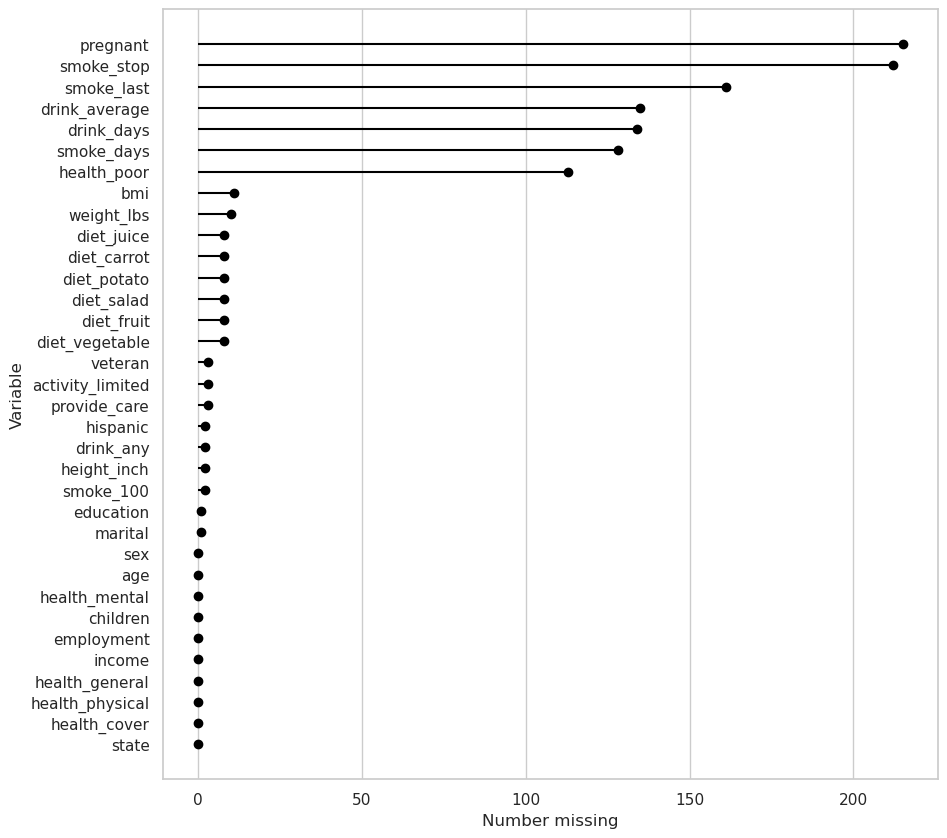

In [74]:
riskfactors_df.missing.missing_variable_plot()

#### Cases / Observations / Rows

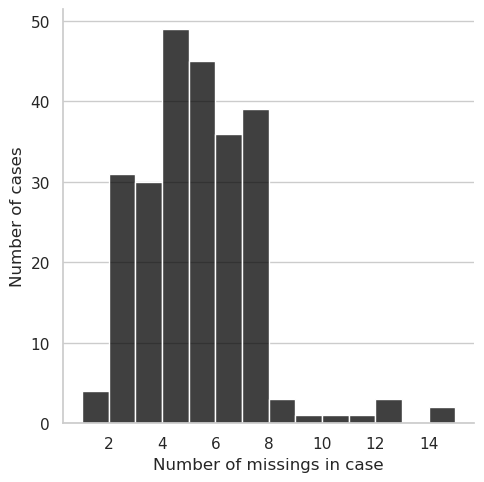

In [75]:
riskfactors_df.missing.missing_case_plot()

##### Intersection among missing values:

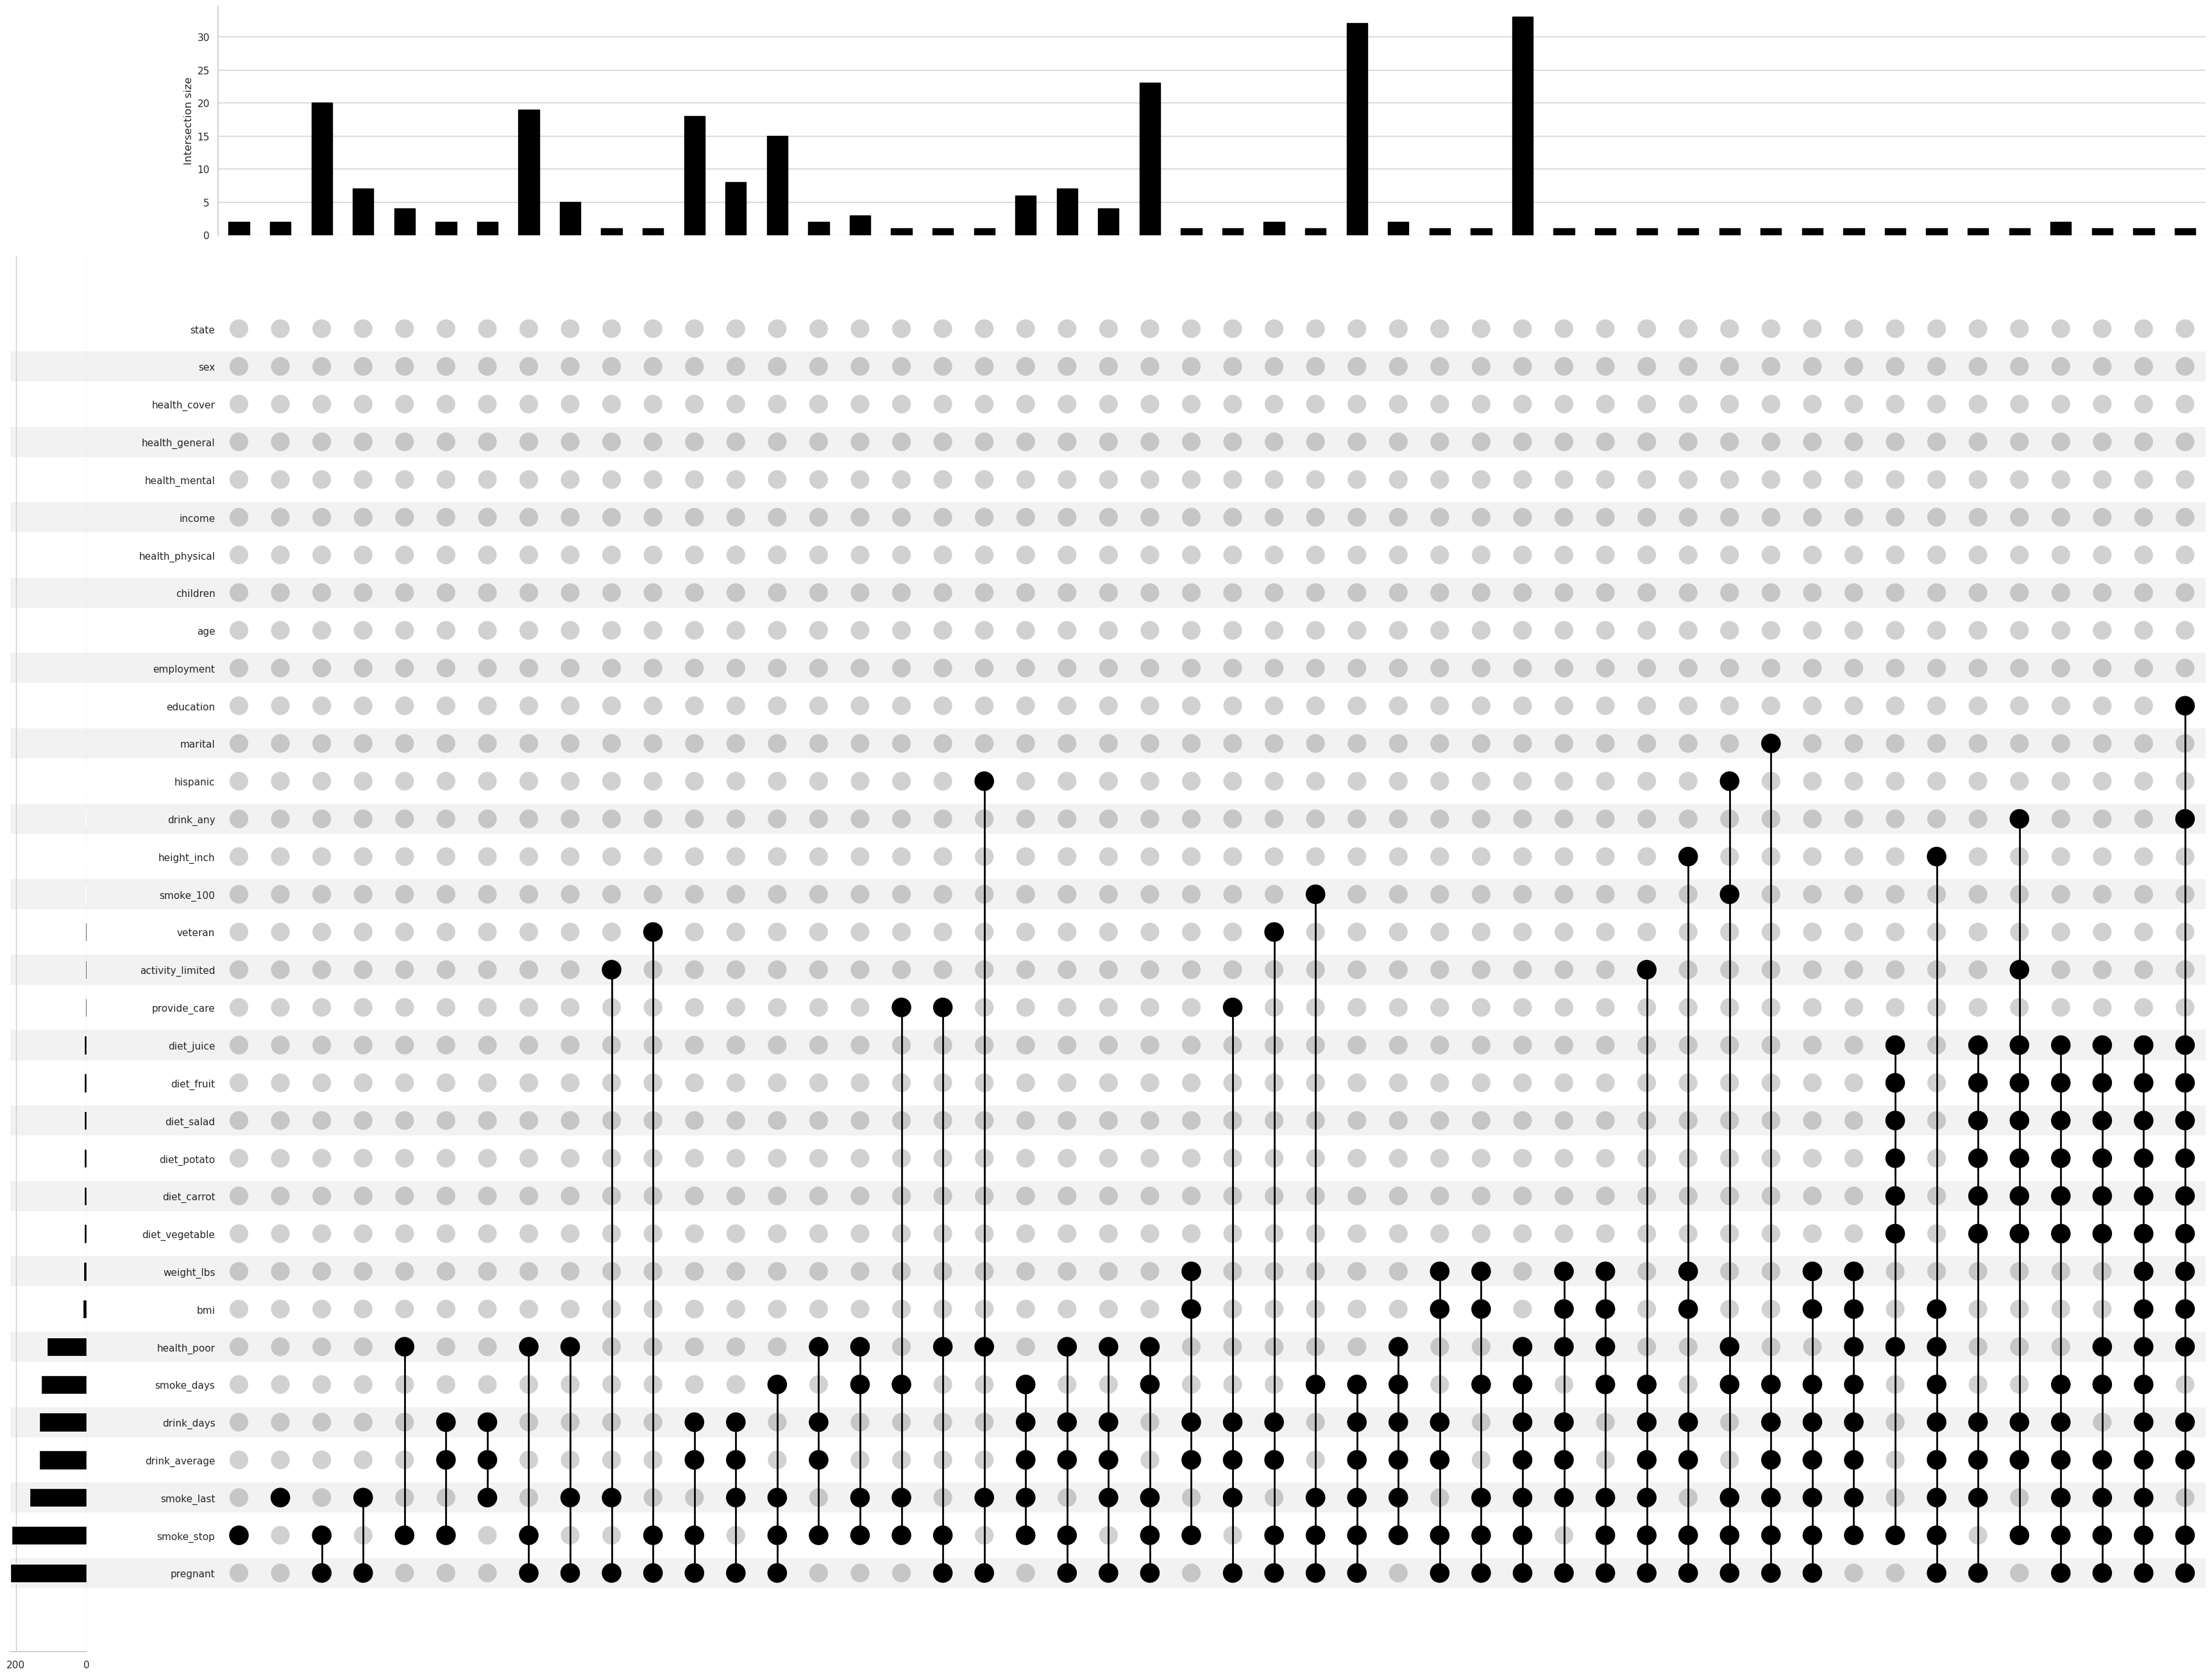

In [79]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables = None,
        element_size = 60
    )
)
plt.show()

### Converting implicit missing values into explicit

In [99]:
implicit_df = pd.DataFrame.from_dict(
    dict(
        name=['lynn', 'lynn', 'lynn', 'zelda'],
        time=['morning', 'afternoon', 'night', 'morning'],
        value=[350, 310, np.nan, 320]
    )
)

implicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


#### Strategies to identify implicit values
**Pivot dataset**

In [100]:
(
    implicit_df
    .pivot_wider(
        index='name',
        names_from='time',
        values_from='value'
    )
)

,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


Quantify n-tuples

In [108]:
(
    implicit_df
    .value_counts(
        subset='name'
    )
    .reset_index(name = "count")
    .query('count < 3')
)

# we need two values for zelda

,name,count
1,zelda,1


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12738d77-d13b-4c0a-b945-c500e075c934' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>